# https://github.com/kavita-bhosle/aai-iot-cleaning-and-eda

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("household_power_consumption.txt", delimiter = ";")
df.head()


<ipython-input-7-a052332f7bee>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.txt", delimiter = ";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [ ]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


In [ ]:
import pandas as pd

# Sample data (replace with your actual dataset)
data = {
    'Datetime': ['2025-01-17 08:30:00', '2025-01-17 14:45:00', '2025-01-17 18:00:00']
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert the 'Datetime' column to pandas datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract date and time from the 'Datetime' column
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

# Show the resulting DataFrame
print(df)


             Datetime        Date      Time
0 2025-01-17 08:30:00  2025-01-17  08:30:00
1 2025-01-17 14:45:00  2025-01-17  14:45:00
2 2025-01-17 18:00:00  2025-01-17  18:00:00


In [ ]:
df.dtypes


,0
Datetime,datetime64[ns]
Date,object
Time,object


In [ ]:
df.Date[0]
df.Time[0]

datetime.time(8, 30)

In [ ]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Datetime
count,3
mean,2025-01-17 13:45:00
min,2025-01-17 08:30:00
25%,2025-01-17 11:37:30
50%,2025-01-17 14:45:00
75%,2025-01-17 16:22:30
max,2025-01-17 18:00:00


# Step 1: Data Preprocessing

**3.1. Data Cleaning**

In [ ]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
file_path = '/content/household_power_consumption.txt'
df = pd.read_csv(file_path)

# Display the first five records
print(df.head())


  Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0  16/12/2006;17:24:00;4.216;0.418;234.840;18.400...                                                                       
1  16/12/2006;17:25:00;5.360;0.436;233.630;23.000...                                                                       
2  16/12/2006;17:26:00;5.374;0.498;233.290;23.000...                                                                       
3  16/12/2006;17:27:00;5.388;0.502;233.740;23.000...                                                                       
4  16/12/2006;17:28:00;3.666;0.528;235.680;15.800...                                                                       


In [ ]:
import pandas as pd

# Load the dataset, skipping lines with too many fields
file_path = '/content/household_power_consumption.txt'

# Read the dataset while skipping problematic lines using `on_bad_lines='skip'`
df = pd.read_csv(file_path, delimiter=';', low_memory=False, on_bad_lines='skip')

# Check the first few rows to verify it was loaded correctly
print(df.head())


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [ ]:
import pandas as pd

# Read the dataset while skipping problematic lines using `on_bad_lines='skip'`
file_path = '/content/household_power_consumption.txt'
df = pd.read_csv(file_path, delimiter=';', low_memory=False, on_bad_lines='skip')

# Convert the relevant continuous columns to numeric, coercing errors to NaN
continuous_vars = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df[continuous_vars] = df[continuous_vars].apply(pd.to_numeric, errors='coerce')

# Calculate mean, median, and mode for continuous variables
results = []

for var in continuous_vars:
    mean_value = df[var].mean()
    median_value = df[var].median()
    mode_value = df[var].mode()[0] if not df[var].mode().empty else "N/A"  # Handling empty mode

    results.append({
        "Variable": var,
        "Type": "Continuous",
        "Mean": mean_value,
        "Median": median_value,
        "Mode": mode_value
    })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

print(results_df)


                Variable        Type        Mean   Median     Mode
0    Global_active_power  Continuous    1.091615    0.602    0.218
1  Global_reactive_power  Continuous    0.123714    0.100    0.000
2                Voltage  Continuous  240.839858  241.010  241.180
3       Global_intensity  Continuous    4.627759    2.600    1.000
4         Sub_metering_1  Continuous    1.121923    0.000    0.000
5         Sub_metering_2  Continuous    1.298520    0.000    0.000
6         Sub_metering_3  Continuous    6.458447    1.000    0.000


# **Outlier Detection**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load the dataset
file_path = '/content/household_power_consumption.txt'
df = pd.read_csv(file_path, delimiter=';', low_memory=False, on_bad_lines='skip')

# Check the first few rows to understand the structure of the data
print(df.shape)

# Convert columns to numeric (assuming there may be non-numeric values in some columns)
df = df.apply(pd.to_numeric, errors='coerce')

# List of columns to check for outliers (you can adjust this list based on your dataset)
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Compute Z-scores for each numerical column
z_scores = np.abs(zscore(df[numerical_columns]))

# Define a threshold for detecting outliers (commonly 3 or higher)
threshold = 3

# Identify rows where any column's Z-score exceeds the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataframe
df_cleaned = df[~outliers]

# Display the dataframe after outlier removal
df_cleaned.head()
print(df_cleaned.shape)


(2075259, 9)
(2075259, 9)


**Data Distribution**

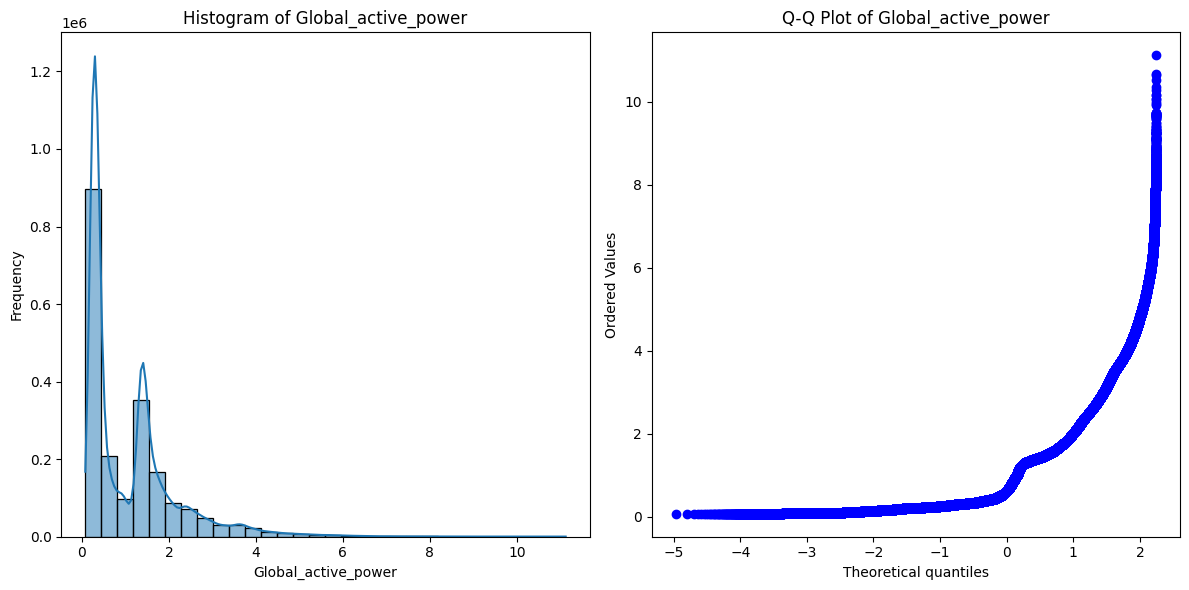

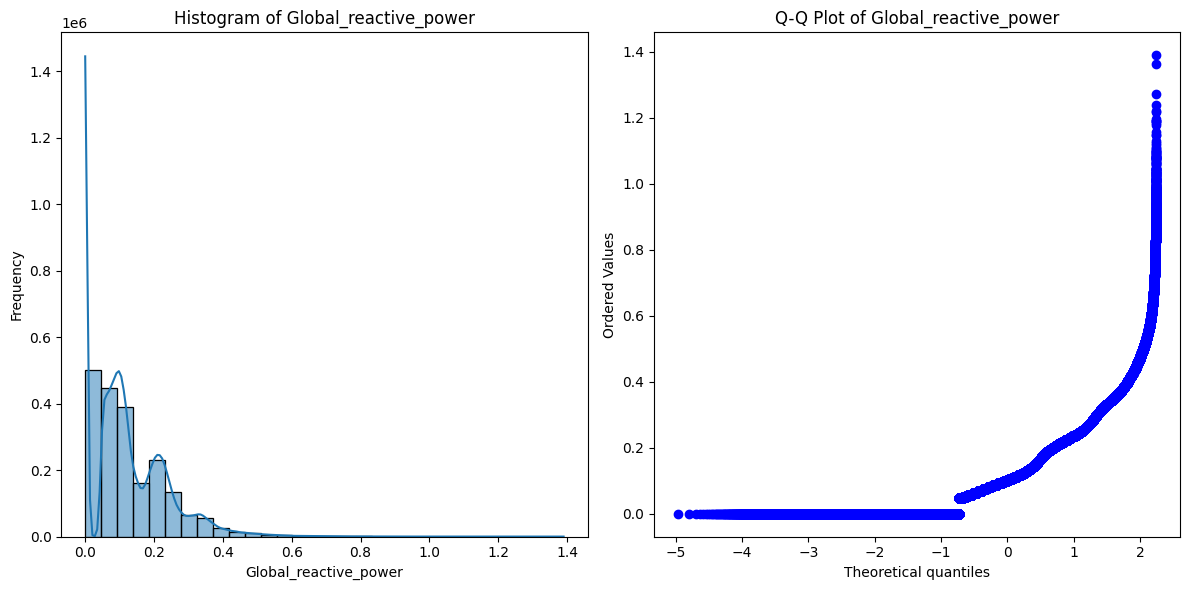

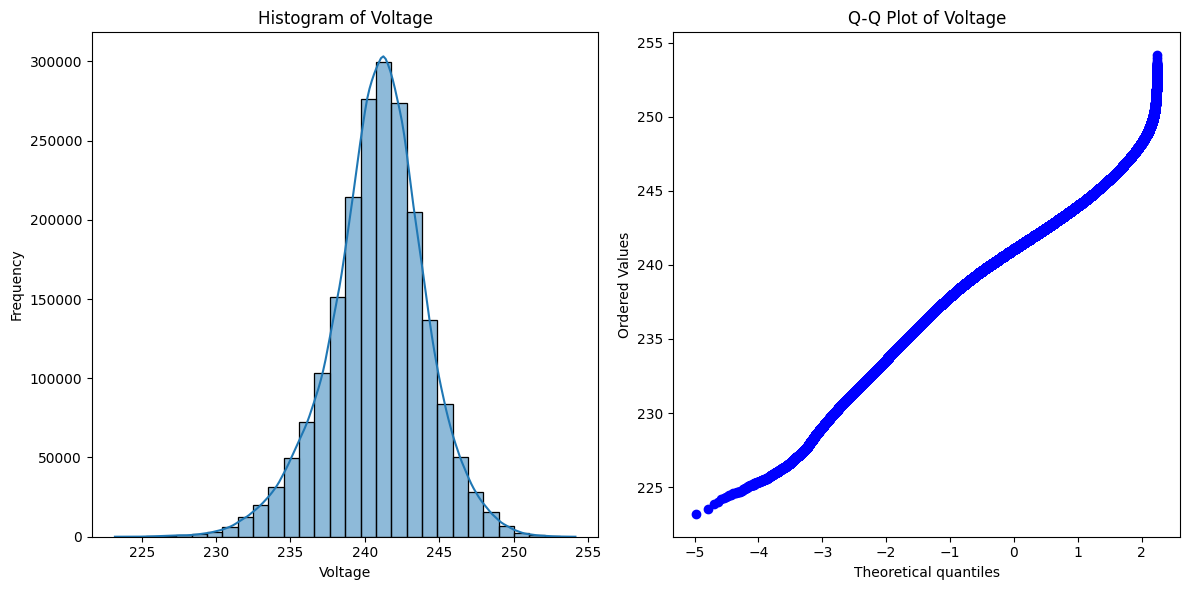

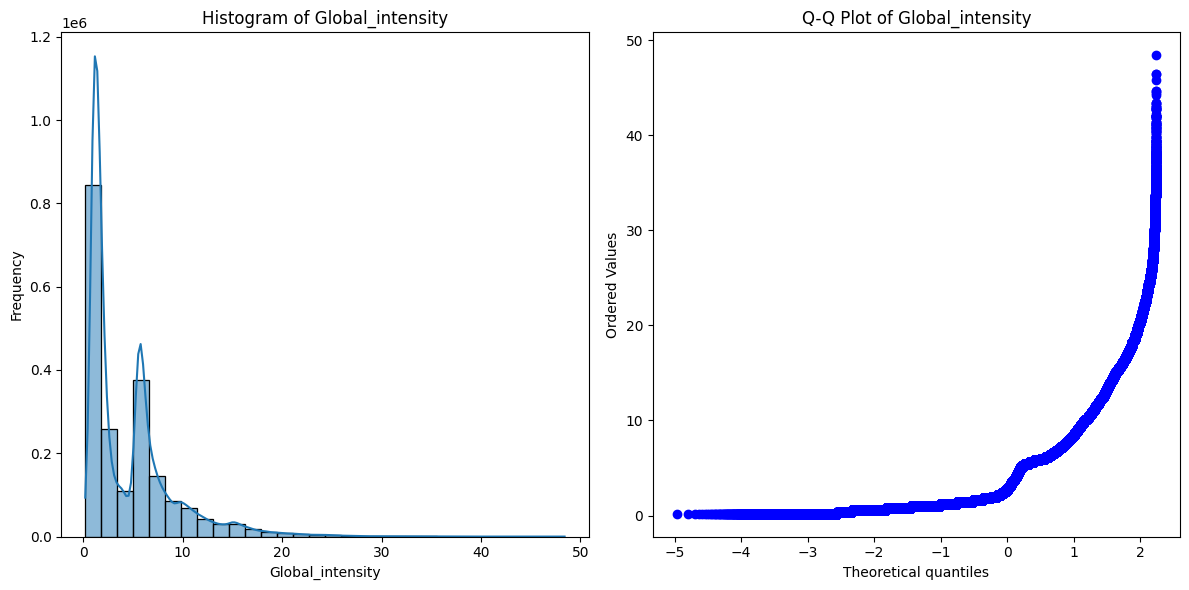

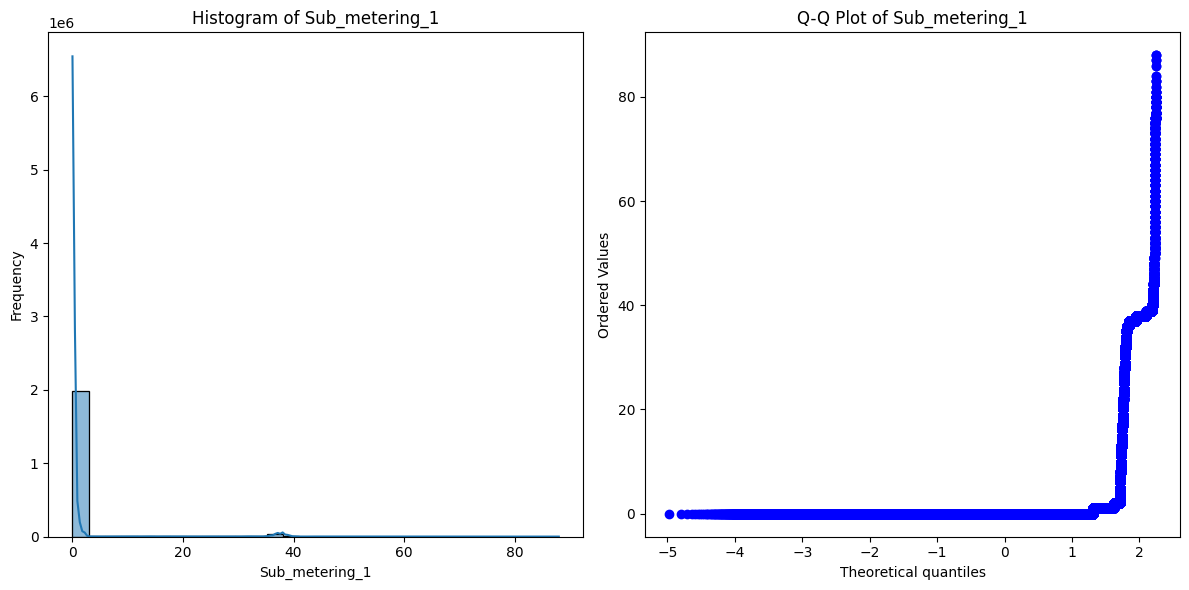

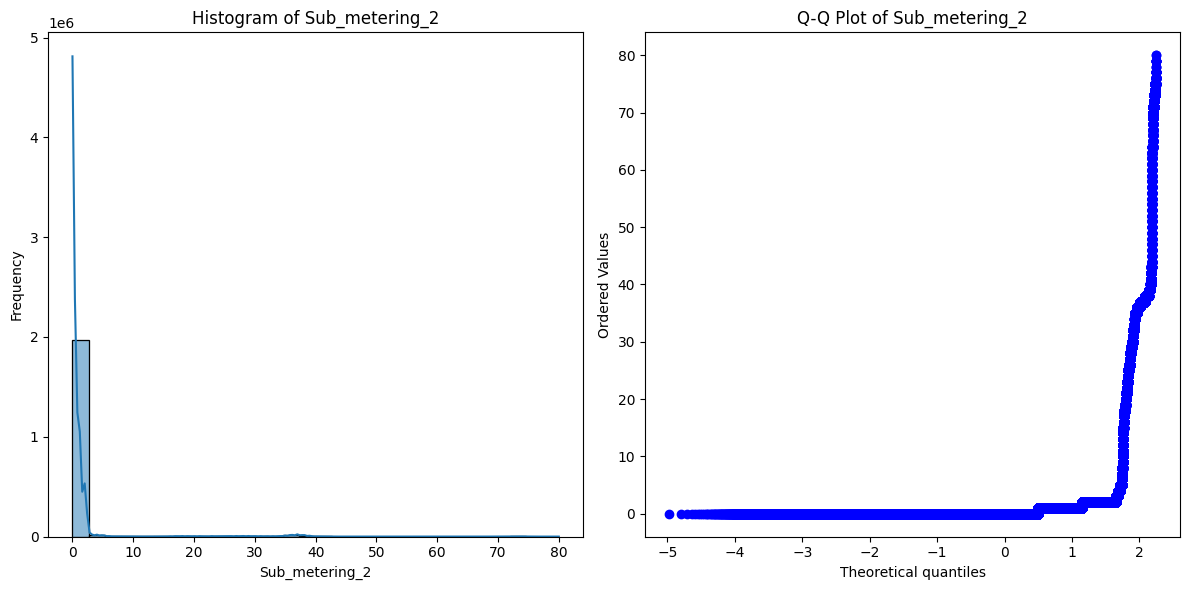

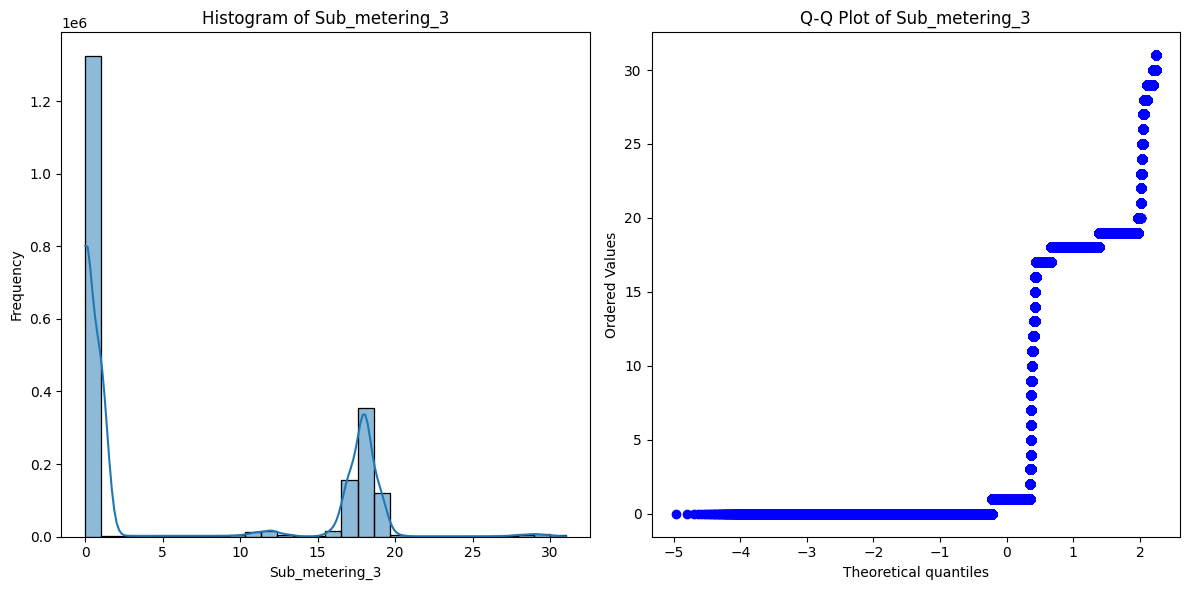

Shapiro-Wilk test for Global_active_power: Statistics=nan, p-value=nan
Global_active_power does not follow a normal distribution (reject H0)

Shapiro-Wilk test for Global_reactive_power: Statistics=nan, p-value=nan
Global_reactive_power does not follow a normal distribution (reject H0)

Shapiro-Wilk test for Voltage: Statistics=nan, p-value=nan
Voltage does not follow a normal distribution (reject H0)

Shapiro-Wilk test for Global_intensity: Statistics=nan, p-value=nan
Global_intensity does not follow a normal distribution (reject H0)

Shapiro-Wilk test for Sub_metering_1: Statistics=nan, p-value=nan
Sub_metering_1 does not follow a normal distribution (reject H0)

Shapiro-Wilk test for Sub_metering_2: Statistics=nan, p-value=nan
Sub_metering_2 does not follow a normal distribution (reject H0)

Shapiro-Wilk test for Sub_metering_3: Statistics=nan, p-value=nan
Sub_metering_3 does not follow a normal distribution (reject H0)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Function to plot histogram and Q-Q plot
def plot_gaussian_distribution(df, column):
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

    plt.tight_layout()
    plt.show()

# Apply the function to each numerical column
for col in continuous_vars:
    plot_gaussian_distribution(df, col)

# Perform Shapiro-Wilk test for normality
for col in continuous_vars:
    stat, p_value = stats.shapiro(df[col])
    print(f'Shapiro-Wilk test for {col}: Statistics={stat:.3f}, p-value={p_value:.3f}')
    if p_value > 0.05:
        print(f'{col} follows a normal distribution (fail to reject H0)\n')
    else:
        print(f'{col} does not follow a normal distribution (reject H0)\n')


**3.2. Feature Scaling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Make sure 'df' is already loaded with the dataset

# Identify the continuous variables (numerical columns) in the dataset
continuous_vars = df.select_dtypes(include=[np.number]).columns

# Initialize the MinMaxScaler (scales values between 0 and 1 by default)
scaler = MinMaxScaler()

# Create a copy of the DataFrame to avoid modifying the original
df1 = df.copy()

# Apply MinMaxScaler to the continuous variables
df1[continuous_vars] = scaler.fit_transform(df1[continuous_vars])

# Check the scaled dataset
df_minmax = df1.copy()

# Display the first few rows of the scaled DataFrame
print(df_minmax.head())



/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:769: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:786: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


   Date  Time  Global_active_power  Global_reactive_power   Voltage  \
0   NaN   NaN             0.374796               0.300719  0.376090   
1   NaN   NaN             0.478363               0.313669  0.336995   
2   NaN   NaN             0.479631               0.358273  0.326010   
3   NaN   NaN             0.480898               0.361151  0.340549   
4   NaN   NaN             0.325005               0.379856  0.403231   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0          0.377593             0.0          0.0125        0.548387  
1          0.473029             0.0          0.0125        0.516129  
2          0.473029             0.0          0.0250        0.548387  
3          0.473029             0.0          0.0125        0.548387  
4          0.323651             0.0          0.0125        0.548387  


# 3.3.	Statistical Analysis:

**Descriptive Statistics**

In [ ]:
import pandas as pd
import numpy as np


# Descriptive statistics for numeric columns
desc_stats = df_minmax[continuous_vars].describe()
print("Descriptive Statistics:\n", desc_stats)

# Calculate mean, median, mode, and standard deviation for specific numerical features
mean_values = df_minmax[continuous_vars].mean()
median_values = df_minmax[continuous_vars].median()
mode_values = df_minmax[continuous_vars].mode().iloc[0]  # Get the first mode
std_dev_values = df_minmax[continuous_vars].std()
variance_values= df_minmax[continuous_vars].var()

# Print results
print("\nMean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)
print("\nStandard Deviation Values:\n", std_dev_values)
print("\nVariance Values:\n", variance_values)
df=df_minmax.copy()
print(df.head())

Descriptive Statistics:
        Date  Time  Global_active_power  Global_reactive_power       Voltage  \
count   0.0   0.0         2.049280e+06           2.049280e+06  2.049280e+06   
mean    NaN   NaN         9.194415e-02           8.900322e-02  5.699469e-01   
std     NaN   NaN         9.571738e-02           8.109495e-02  1.046845e-01   
min     NaN   NaN         0.000000e+00           0.000000e+00  0.000000e+00   
25%     NaN   NaN         2.100308e-02           3.453237e-02  5.101777e-01   
50%     NaN   NaN         4.761905e-02           7.194245e-02  5.754443e-01   
75%     NaN   NaN         1.314503e-01           1.395683e-01  6.361874e-01   
max     NaN   NaN         1.000000e+00           1.000000e+00  1.000000e+00   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       9.186223e-02    1.274913e-02    1.623150e-02    2.083370e-01  
std        9.220739e-02    6.992081e-02  

ANNOVA F Test

# EDA

# **Bivariate Analysis**

Correlation Matrix for Continuous Variables:
                       Date  Time  Global_active_power  Global_reactive_power  \
Date                    NaN   NaN                  NaN                    NaN   
Time                    NaN   NaN                  NaN                    NaN   
Global_active_power     NaN   NaN             1.000000               0.247017   
Global_reactive_power   NaN   NaN             0.247017               1.000000   
Voltage                 NaN   NaN            -0.399762              -0.112246   
Global_intensity        NaN   NaN             0.998889               0.266120   
Sub_metering_1          NaN   NaN             0.484401               0.123111   
Sub_metering_2          NaN   NaN             0.434569               0.139231   
Sub_metering_3          NaN   NaN             0.638555               0.089617   

                        Voltage  Global_intensity  Sub_metering_1  \
Date                        NaN               NaN             NaN   
Time  

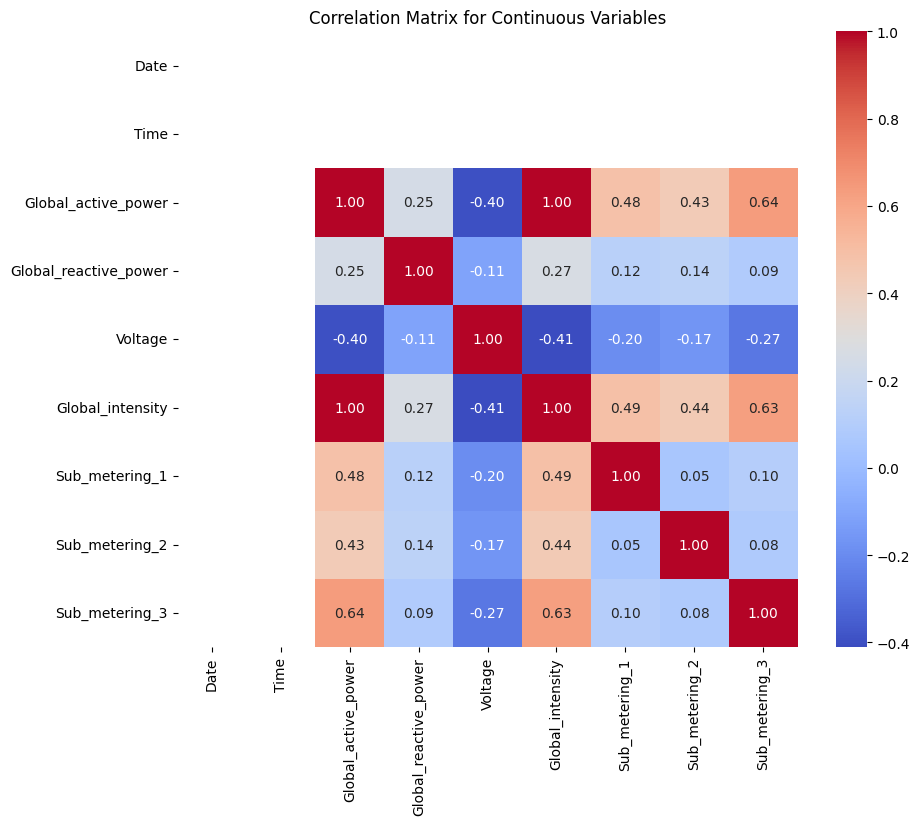

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Bivariate analysis: Continuous vs. Continuous (Correlation matrix)
print("Correlation Matrix for Continuous Variables:")
correlation_matrix = df[continuous_vars].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Continuous Variables")
plt.show()


